<a href="https://colab.research.google.com/github/moriwam01/Feature-Importance-XAI/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/archive(1).zip'
extract_folder = '/content/drive/MyDrive'
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:

path = "/content/drive/MyDrive/archive(1)/kddcup.data_10_percent.gz"
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
           "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
           "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
           "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
           "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
           "dst_host_srv_rerror_rate", "target"]
df = pd.read_csv(path, names=columns)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
attacks_types = {
    'normal.': 'normal',
    'smurf.': 'dos',
    'neptune.': 'dos',
    'back.': 'dos',
    'satan.': 'probe',
    'ipsweep.': 'probe',
    'portsweep.': 'probe',
    'warezclient.': 'r2l',
    'teardrop.': 'dos',
    'pod.': 'dos',
    'nmap.': 'probe',
    'guess_passwd.': 'r2l',
    'buffer_overflow.': 'u2r',
    'land.': 'dos',
    'warezmaster.': 'r2l',
    'imap.': 'r2l',
    'rootkit.': 'u2r',
    'loadmodule.': 'u2r',
    'ftp_write.': 'r2l',
    'multihop.': 'r2l',
    'phf.': 'r2l',
    'perl.': 'u2r',
    'spy.': 'r2l'
}

<ipython-input-6-410995d03f92>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


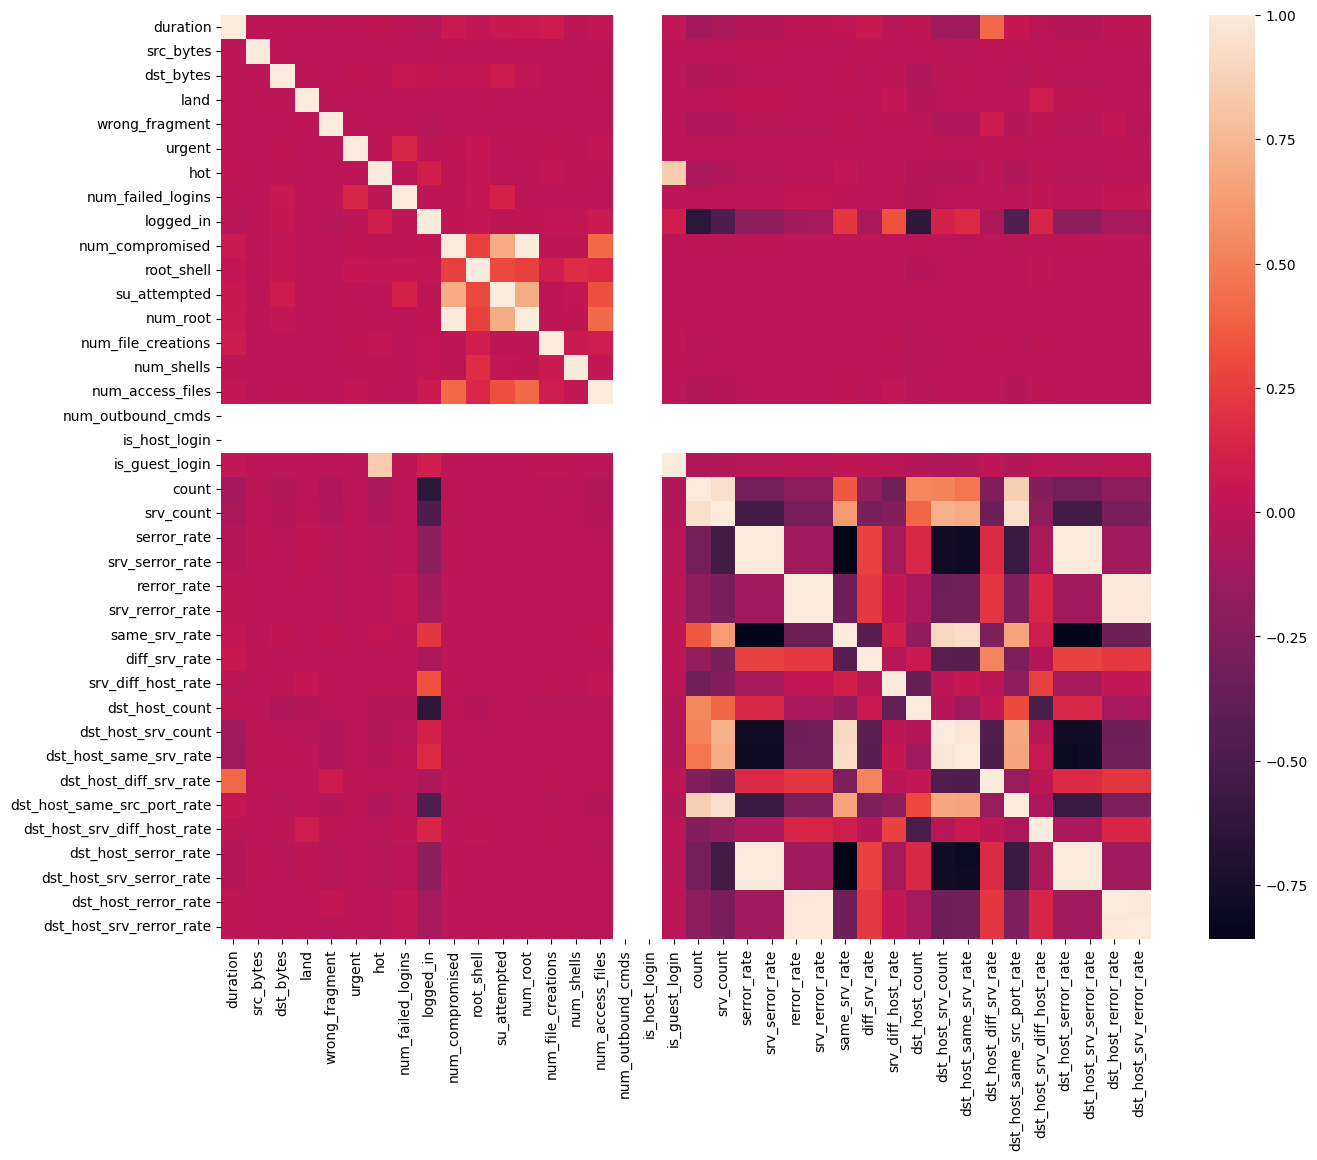

In [ ]:
df['Attack Type'] = df.target.apply(lambda r:attacks_types.get(r[:-1], 'unknown'))

corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [ ]:
X = df.drop(['target', 'Attack Type'], axis=1)
y = df['Attack Type']

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['protocol_type', 'service', 'flag']
Numerical Columns: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
column_headers = X_encoded.columns.tolist()

In [ ]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [ ]:
column_headers = X_encoded.columns.tolist()


In [ ]:
ig = MIC(X_encoded, y)

In [ ]:
feature_scores = {column_headers[i]: ig[i] for i in range(len(column_headers))}

sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

Feature Importance Scores:
Feature: flag_SF Score: 0.10525814354720153
Feature: same_srv_rate Score: 0.09632630326780733
Feature: service_ecr_i Score: 0.09103384943824655
Feature: dst_host_same_src_port_rate Score: 0.08855969685498932
Feature: dst_host_same_srv_rate Score: 0.08774029848933307
Feature: dst_host_srv_count Score: 0.0850974283819218
Feature: dst_host_count Score: 0.07080991158945094
Feature: srv_count Score: 0.05841435215641677
Feature: protocol_type_tcp Score: 0.04838070311450726
Feature: count Score: 0.045704872195038826
Feature: service_private Score: 0.016264828148328525
Feature: serror_rate Score: 0.010284313149977686
Feature: dst_host_serror_rate Score: 0.010246865349175849
Feature: srv_serror_rate Score: 0.010171801063784236
Feature: dst_host_srv_serror_rate Score: 0.010035673247355659
Feature: flag_S0 Score: 0.009957066602428455
Feature: logged_in Score: 0.007187953548530079
Feature: service_http Score: 0.005428244278411265
Feature: srv_rerror_rate Score: 0.0021355

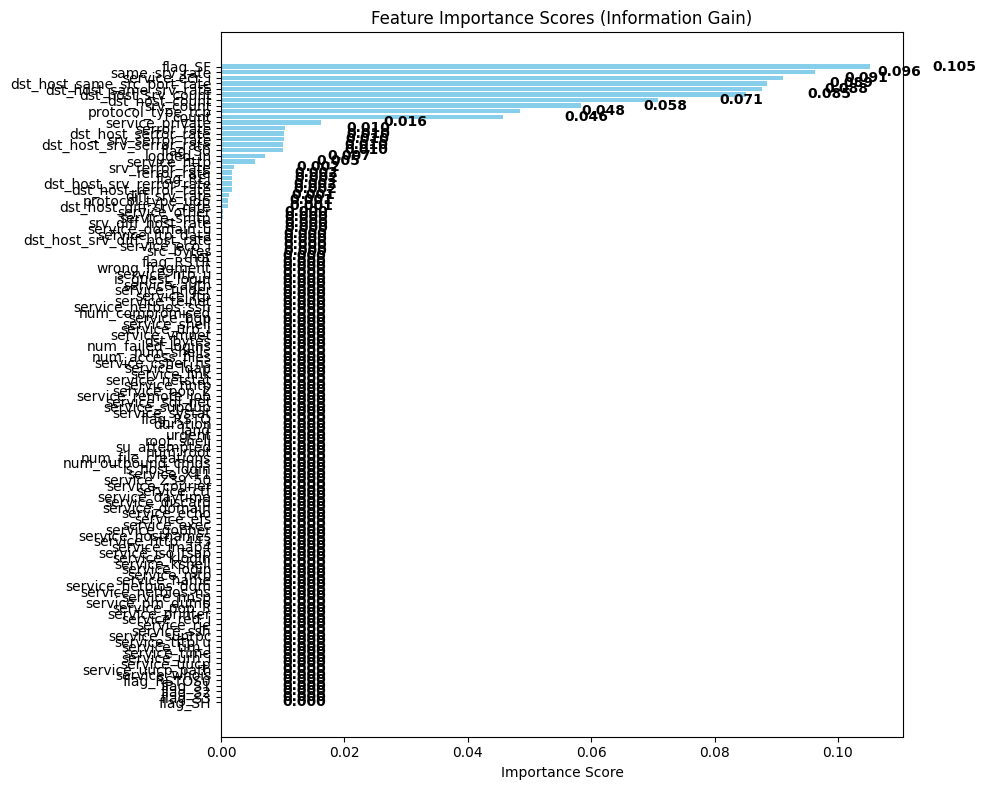

In [ ]:
import matplotlib.pyplot as plt

print("Feature Importance Scores:")
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
fig, ax = plt.subplots(figsize=(10, 8))
y_pos = np.arange(len(sorted_features))

scores = [score for _, score in sorted_features]
feature_names = [feature for feature, _ in sorted_features]

ax.barh(y_pos, scores, align="center", color="skyblue")
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", fontweight="bold", va='center')

plt.tight_layout()
plt.show()

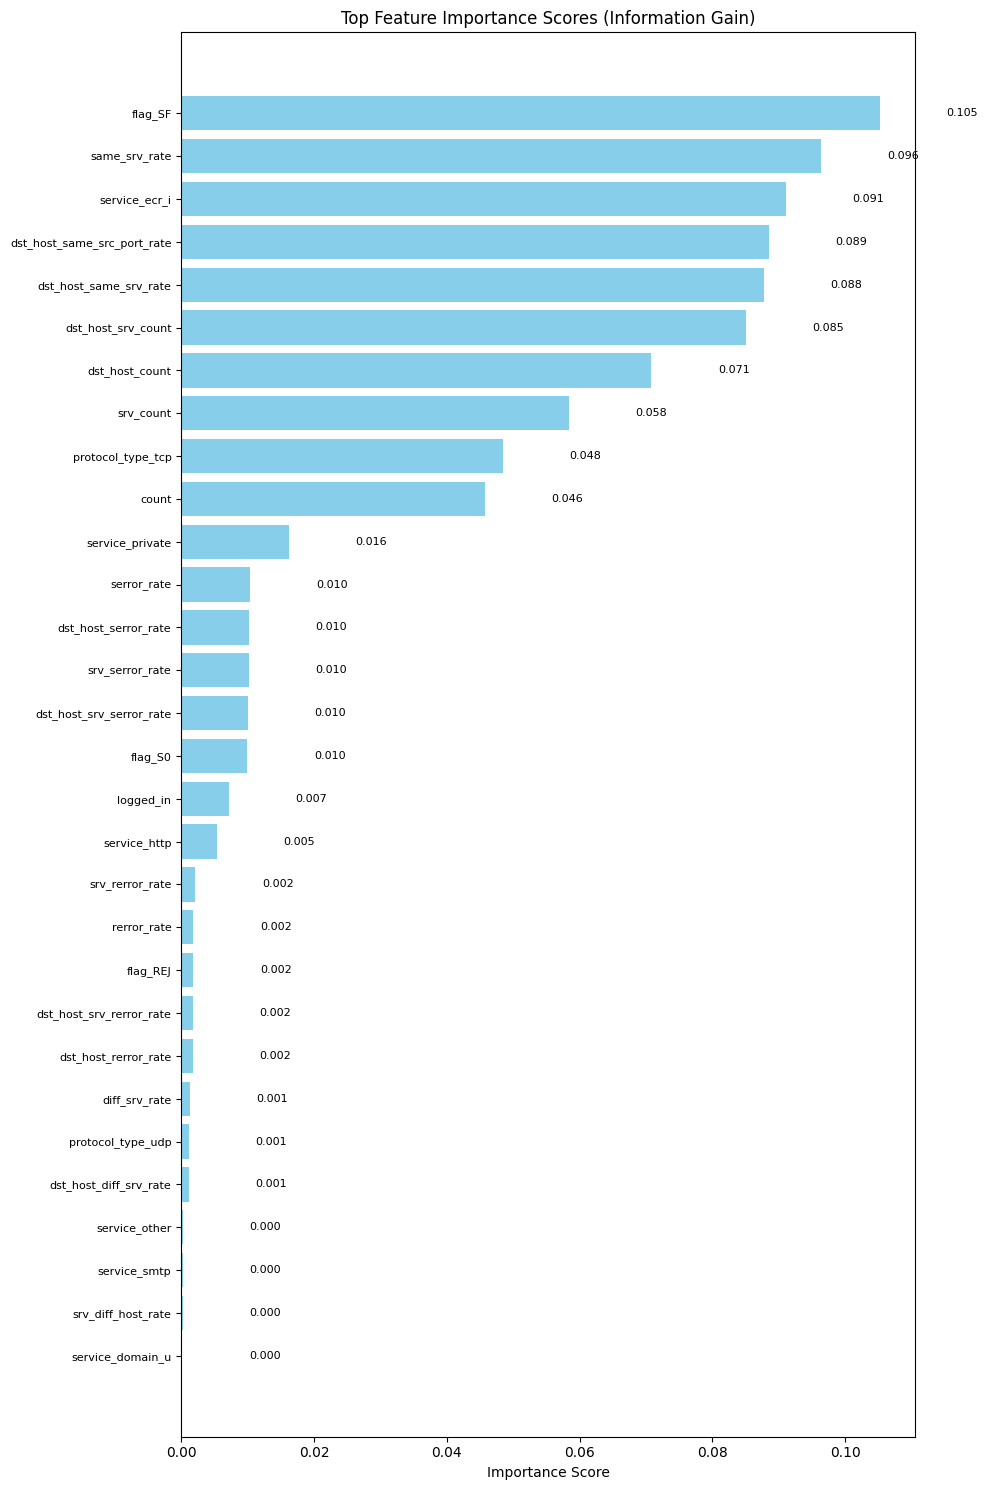

In [ ]:
import matplotlib.pyplot as plt
top_sorted_features = sorted_features[:top_n]

plt.figure(figsize=(10, 15))

y_pos = np.arange(len(top_sorted_features))
scores = [score for feature, score in top_sorted_features]
feature_names = [feature for feature, score in top_sorted_features]

plt.barh(y_pos, scores, color='skyblue')
plt.yticks(y_pos, feature_names, fontsize=8)
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Top Feature Importance Scores (Information Gain)')

for i, v in enumerate(scores):
    plt.text(v + 0.01, i, f"{v:.3f}", color='black', va='center', fontsize=8)

plt.tight_layout()
plt.show()


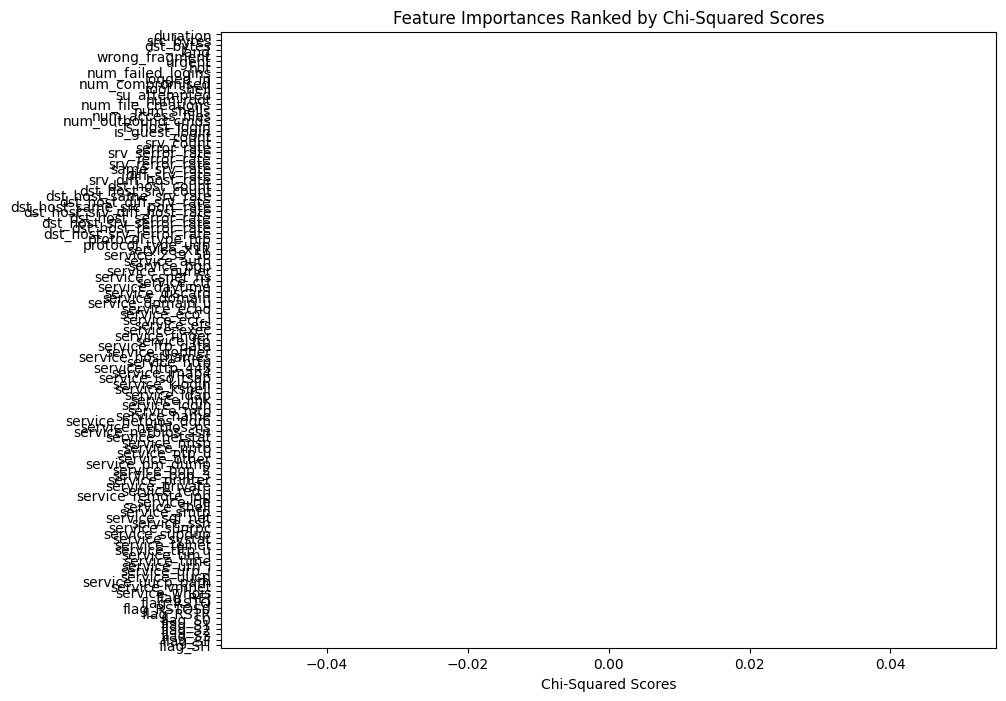

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
k = 'all'
chi_scores = SelectKBest(score_func=chi2, k=k).fit(X_encoded, y)

feat_importances = pd.Series(chi_scores.scores_, index=X_encoded.columns)

plt.figure(figsize=(10, 8))
feat_importances.nlargest(len(feat_importances)).plot(kind='barh', color='teal')
plt.xlabel('Chi-Squared Scores')
plt.title('Feature Importances Ranked by Chi-Squared Scores')
plt.gca().invert_yaxis()
plt.show()

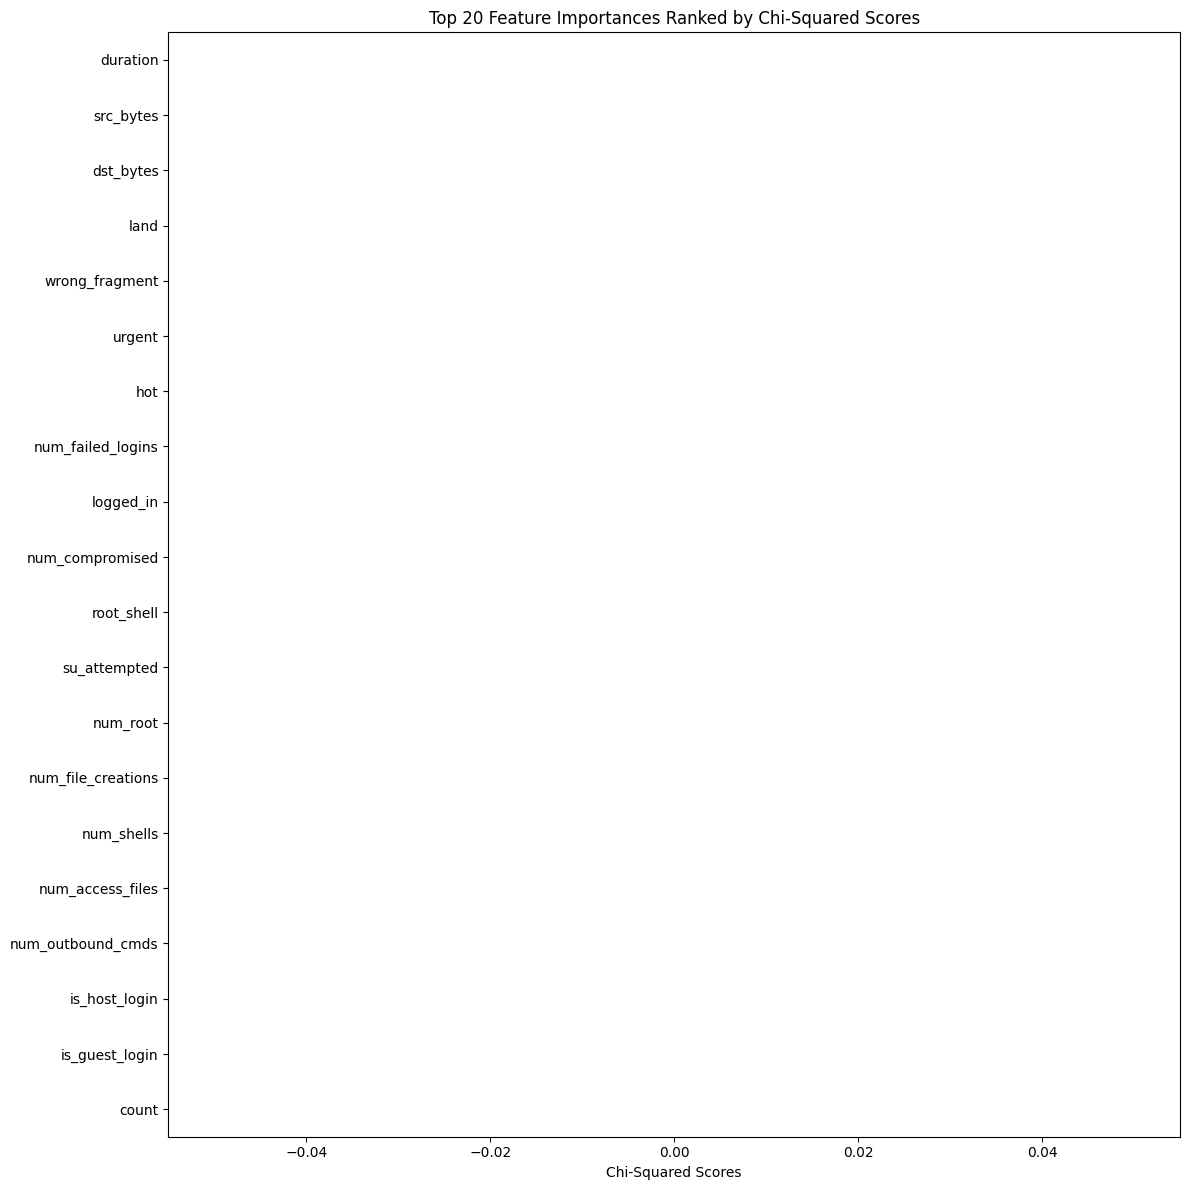

In [ ]:
plt.figure(figsize=(12, 12))
top_n = 20
top_features = feat_importances.nlargest(top_n)

top_features.plot(kind='barh', color='teal')
plt.xlabel('Chi-Squared Scores')
plt.title('Top 20 Feature Importances Ranked by Chi-Squared Scores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
!pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
from skfeature.function.similarity_based import fisher_score
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

scores = fisher_score.fisher_score(X, y)

feat_importances = pd.Series(scores, index=dataframe.columns[:-1])

plt.figure(figsize=(10, 8))
feat_importances.nlargest(len(feat_importances)).plot(kind='barh', color='teal')
plt.xlabel('Fisher Score')
plt.title('Feature Importances Ranked by Fisher Score')
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.10/dist-packages/skfeature/utility/construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


In [ ]:
import matplotlib.pyplot as plt

top_n = 20
top_features = sorted_features[:top_n]

plt.figure(figsize=(12, 10))  tures
y_positions = np.arange(len(top_features))

feature_names = [feature for feature, _ in top_features]
importance_scores = [score for _, score in top_features]

plt.barh(y_positions, importance_scores, color='skyblue')
plt.yticks(y_positions, feature_names, fontsize=10)
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Top Feature Importance Scores')

for i, (feature, score) in enumerate(top_features):
    plt.text(score, i, f'{score:.3f}', va='center', ha='right', fontsize=8, color='navy')

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-22-328f427a87f1>, line 6)

In [ ]:
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()